# Project: Investigate The Dataset (TMDb_movie_dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

#### <a id='intro'></a>
## Introduction
<body>
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue
.let's have some fun!
</body>    

#### Dataset contains:
 <body>   
    -10866 Rows.
    -20 cloumns.
 </body> 
 
##### Cloumns Headers 
   <body>
       <p>-id (A unique identification for each movie.)</p>
       <p>-imdb_id (A unique identification for each movie on IMDBP).</p>
       <p>-popularity (A numirec).</p>
       <p>-budget (The budget spent in US Dollars).</p>
       <p>-revenue (The earning amount in US Dollars).</p>
       <p>-original_title (The released movie title).</p>
       <p>-cast (Main actors for each movies).</p>
       <p>-homepage (The link of the web site of movie if any).</p>
       <p>-director (Movie's tagline).</p>
       <p>-keywords (The keywords related to the movie).</p>
       <p>-overview (a brief statement of descripe the story of the movie).</p>
       <p>-runtime (The total duration of the movie in minutes).</p>
       <p>-genres (the genre of the movie).</p>
       <p>-production_companies (The production company of the movie).</p>
       <p>-release_date (the date of releasing the movie).</p>
       <p>-vote_count (The number of the votes that given to the movie).</p>
       <p>-vote_average (The average score of rating).</p>
       <p>-release_year (The movie released year).</p>
       <p>-budget_adj (The budget of the movies in terms of exchange rate of 2010 US Dollars).</p>
       <p>-revenue_adj (The revenue of the movies in terms of exchange rate of 2010 US Dollars).</p>
     </body>
   

In [1]:
##importing the all needed packages to analysis data.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
>In the process of analyzing the dataset we will keep only the relevant data and delete the unused data. 

### General Properties

In [2]:
# Loding datatset file and recognize its shape and structure.
df = pd.read_csv('tmdb-movies.csv', index_col='id')

#print first 3 rows of dataset.
df.head(3)

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
#exploring the shape of the dataset to find if there are missing datat,
#null values or duplicted values.
    
df.shape

(10866, 20)

In [4]:
#figure out the summary information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               10856 non-null  object 
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   homepage              2936 non-null   object 
 7   director              10822 non-null  object 
 8   tagline               8042 non-null   object 
 9   keywords              9373 non-null   object 
 10  overview              10862 non-null  object 
 11  runtime               10866 non-null  int64  
 12  genres                10843 non-null  object 
 13  production_companies  9836 non-null   object 
 14  release_date          10866 non-null  object 
 15  vote_count    

In [5]:
#counting the total rows has missing data
df.isna().sum()

imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
#counting the duplicated rows
df.duplicated().sum()

1

There are some zero values in budget, revenue and runtime 

In [7]:
#calculate and find out some useful statistics information using descripe function
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [8]:
#listing columns headres of the dataframe
print(list(df.columns.values))

['imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj']




### Data Cleaning (Walking through the dataset and clean all unnecessary and bad data)

#### 1- Drop all cloumns we will not use in our analysis process

> we can drop down 9 cloumns which unusable in our analysis.

In [9]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

#using drop function to drop down unseful cloumns.
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date', 'budget_adj', 'revenue_adj'], axis=1, inplace= True)

Dataframe shape after removing unused cloumns: (10866 rows, 11 cloumns)

In [10]:
df.shape

(10866, 11)

In [11]:
#drop the duplicated row
df.drop_duplicates(inplace = True)

Riding off the null values in cast, director and genres cloumns

In [12]:
#using notnull function to clean null values in the cast,director and genres cloumns

df = df[df['cast'].notnull()]
df = df[df['director'].notnull()]
df = df[df['genres'].notnull()]

In [13]:
#obtain the mean values of budget, revenue and runtime using mean function

print(df['budget'].mean())
print(df['revenue'].mean())
print (df['runtime'].mean())

14803646.144068586
40319887.588016026
102.46882862734135


Replacing Zero values in buget, revenue and runtime with the mean value of each.

In [14]:
#Replacing Zero values with mean values

df['budget'] = df['budget'].replace(0, 17549894.037320614)
df['revenue'] = df['revenue'].replace(0, 17549894.037320614)
df['runtime'] = df['runtime'].replace(0, 102.46882862734135)

In [15]:
#check the result
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,10731.000000,1.073100e+04,1.073100e+04,10731.000000,10731.000000,10731.000000,10731.000000
mean,0.652615,2.392612e+07,4.994935e+07,102.736197,219.812972,5.964710,2001.259622
std,1.004804,2.778085e+07,1.146376e+08,30.040062,578.815324,0.930283,12.820151
min,0.000188,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000
25%,0.210765,1.754989e+07,1.754989e+07,90.000000,17.000000,5.400000,1995.000000
50%,0.387081,1.754989e+07,1.754989e+07,99.000000,39.000000,6.000000,2006.000000
75%,0.720889,1.754989e+07,2.500000e+07,112.000000,148.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (How many movies produced yearly?)

In [16]:
#using groupby function to collect all movies yearly basis
df.groupby('release_year').count()['original_title'].sort_values()


release_year
1969     30
1961     31
1960     32
1962     32
1963     34
1965     35
1967     38
1968     38
1970     40
1972     40
1964     42
1975     44
1966     46
1974     46
1976     47
1973     55
1971     55
1977     56
1979     57
1978     65
1980     78
1983     80
1982     81
1981     82
1984    104
1985    108
1986    120
1987    124
1990    132
1992    132
1991    133
1989    135
1988    142
1995    174
1993    177
1994    184
1997    191
1996    203
1998    210
1999    224
2000    224
2001    241
2002    264
2003    281
2004    307
2005    361
2006    404
2007    432
2010    475
2008    486
2009    525
2011    532
2012    574
2015    617
2013    649
2014    682
Name: original_title, dtype: int64

>It was (2014, 2013, 2015, 2012, 2011) that had the most released movies, and (1969, 1961, 1960, 1962, 1963) that had the fewest released movies.

In [17]:
#difining a function to be used later
def label(x, y, t):
        plt.xlabel(x)
        plt.ylabel(y)
        plt.title(t)
        plt.show()

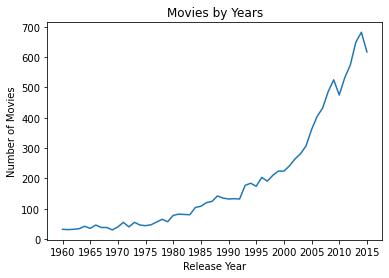

In [18]:
#using matplotlib to visulaizing the results
df.groupby('release_year').count()['original_title'].plot(xticks = np.arange(1960, 2016,5));
label('Release Year', 'Number of Movies', 'Movies by Years')

>It is clear from the above information that there is an increase in movie release every year, with a significant increase since 2000 as demonstrated in the plot chart for movies by year.

### Research Question 2 (What is the most and least profitable movies?)

In [19]:
#to answer the first question we have to insert a new cloumn "profit"
df.insert(11, 'profit',df['revenue']-df['budget'])

In [20]:
df.head(3)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_count,vote_average,release_year,profit
id,,,,,,,,,,,,
135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.363529e+09
76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,2.284364e+08
262500,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.852382e+08


In [21]:
#Using nlargest function to figuring the Top Ten profitable movies
top_ten = df.nlargest(10, 'profit')
top_ten['original_title']

id
19995                                           Avatar
140607                    Star Wars: The Force Awakens
597                                            Titanic
135397                                  Jurassic World
168259                                       Furious 7
24428                                     The Avengers
12445     Harry Potter and the Deathly Hallows: Part 2
99861                          Avengers: Age of Ultron
109445                                          Frozen
1642                                           The Net
Name: original_title, dtype: object

###### The top ten profitable movies were
<body>
    <p>1-Avatar.
    <p>2-Star Wars: The Force Awakens.
    <p>3-Titanic.
    <p>4-Jurassic World.
    <p>5-Furious 7.
    <p>6-The Avengers.
    <p>7-Harry Potter and the Deathly Hallows: Part 2.
    <p>8-Avengers: Age of Ultron.
    <p>9-Frozen.
    <p>10-The Net.                               

In [22]:
#Using nlargest function to figuring the lowest Ten profitable movies
lowest_ten = df.nsmallest(10, 'profit')
lowest_ten['original_title']

id
46528                The Warrior's Way
57201                  The Lone Ranger
7978                       The Wolfman
10733                        The Alamo
50321                  Mars Needs Moms
189197                     The Pacific
10009                     Brother Bear
1911                  The 13th Warrior
11692     The Adventures of Pluto Nash
48495                   Double Wedding
Name: original_title, dtype: object

###### The lowest ten profitable movies were
<body>
<p>1-The Warrior's Way.
<p>2-The Lone Ranger.
<p>3-The Wolfman.
<p>4-The Alamo.
<p>5-Mars Needs Moms.
<p>6-The Pacific.
<p>7-Brother Bear.
<p>8-The 13th Warrior.
<p>9-The Adventures of Pluto Nash.
<p>10-Double Wedding.

### Research Question 3 (What are the genres with the most revenue, budgeting, and profitability?)

#####  In order to answer this question, we need to separate the genres since each movie has one or more genres.

In [23]:
#Spliting the genres using split function.
genres_df = df['genres'].str.split('|', expand=True)
genres_df.head(3)

,0,1,2,3,4
id,,,,,
135397,Action,Adventure,Science Fiction,Thriller,None
76341,Action,Adventure,Science Fiction,Thriller,None
262500,Adventure,Science Fiction,Thriller,None,None


In [24]:
#Then we will gathering all genres under its id.
genres_df = genres_df.stack()
genres_df = pd.DataFrame(genres_df)
genres_df.head()

0
id                       
135397 0           Action
       1        Adventure
       2  Science Fiction
       3         Thriller
76341  0           Action

In [25]:
#creating a new cloumn contains the adjusted genres
genres_df.rename(columns={0:'genres_adj'}, inplace=True)
genres_df.genres_adj.value_counts()

Drama              4746
Comedy             3775
Thriller           2902
Action             2376
Romance            1708
Horror             1636
Adventure          1465
Crime              1353
Science Fiction    1221
Family             1214
Fantasy             908
Mystery             808
Animation           664
Documentary         470
Music               399
History             330
War                 268
Foreign             184
Western             164
TV Movie            162
Name: genres_adj, dtype: int64

> The dataset contains 20 unique genres, the genres used to descripe the movies in that order:

    1-Drama              4746
    2-Comedy             3775
    3-Thriller           2902
    4-Action             2376
    5-Romance            1708
    6-Horror             1636
    7-Adventure          1465
    8-Crime              1353
    9-Science Fiction    1221
    10-Family            1214
    11-Fantasy           908
    12-Mystery           808
    13-Animation         664
    14-Documentary       470
    15-Music             399
    16-History           330
    17-War               268
    18-Foreign           184
    19-Western           164
    20-TV Movie          162

In [26]:
#adding the adjusting genre cloumn to the main dataframe
df_merged = df.merge(genres_df, left_index=True, right_index=True)
df_merged.head(2)

popularity       budget       revenue  original_title  \
id                                                                
135397 0   32.985763  150000000.0  1.513529e+09  Jurassic World   
       1   32.985763  150000000.0  1.513529e+09  Jurassic World   

                                                       cast         director  \
id                                                                             
135397 0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   
       1  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   

          runtime                                     genres  vote_count  \
id                                                                         
135397 0    124.0  Action|Adventure|Science Fiction|Thriller        5562   
       1    124.0  Action|Adventure|Science Fiction|Thriller        5562   

          vote_average  release_year        profit genres_adj  
id                                                             
135397 0           6.5          2015  1.363529e+09     Action  
       1           6.5          2015  1.363529e+09  Adventure

In [27]:
#dropping down the original genre cloumn from our dataframe.
df_merged.drop('genres', axis=1, inplace=True)

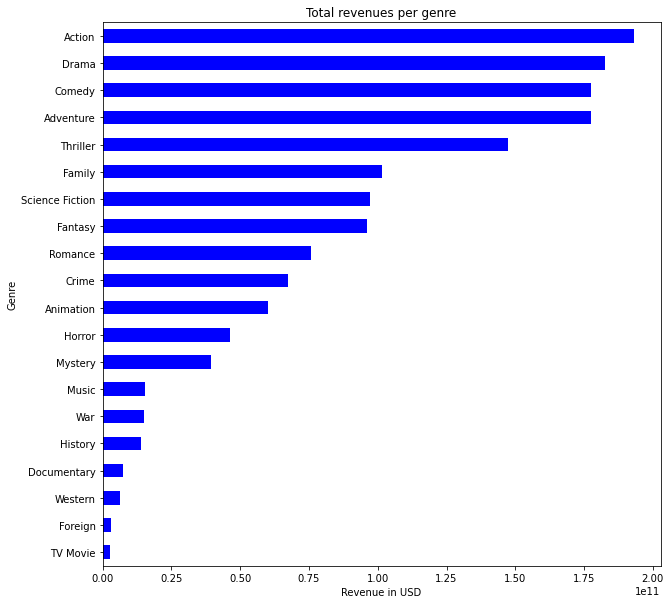

In [28]:
# Which genres generating the highest revenues
df_merged.groupby('genres_adj').revenue.sum().sort_values().plot.barh(color='b', figsize=(10,10), fontsize= 10)
label('Revenue in USD', 'Genre', 'Total revenues per genre')

>We can see from the above bar chart that the genres contributing the most to revenue were (Action, Drama, Comedy, Adventure, Thriller) in that order.

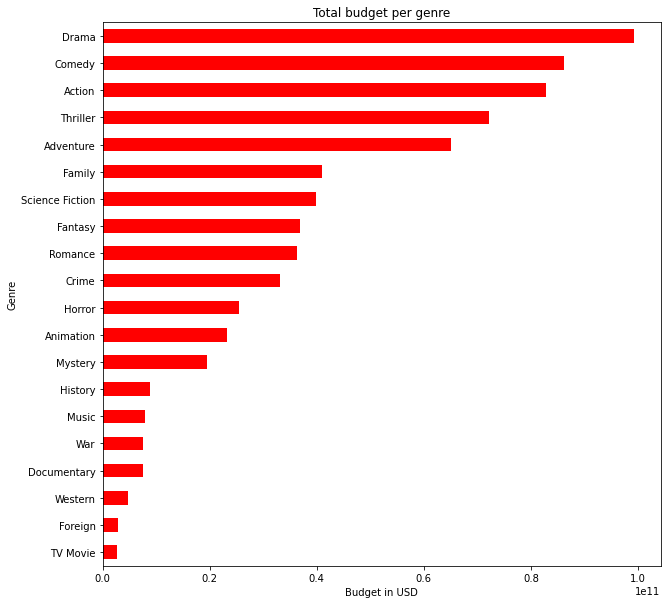

In [29]:
# Which genres generating the highest budgets
df_merged.groupby('genres_adj').budget.sum().sort_values().plot.barh(color='r', figsize=(10,10), fontsize= 10)
label('Budget in USD', 'Genre', 'Total budget per genre')

> Above is the bar chart that clearly indicates the highest budget genres for producing movies are (Drama, Comedy, Action, Thriller, Adventure) in that order.

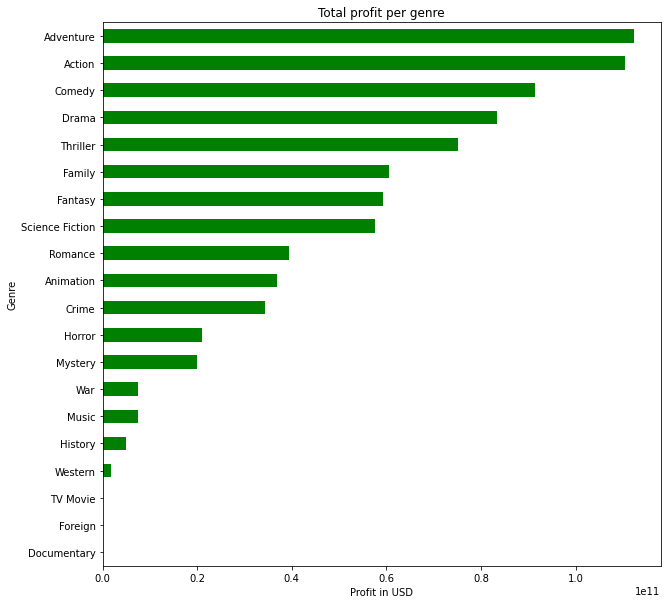

In [30]:
# Which genres generating the highest profit
df_merged.groupby('genres_adj').profit.sum().sort_values().plot.barh(color='g', figsize=(10,10), fontsize= 10);
label('Profit in USD', 'Genre', 'Total profit per genre')

>From highest to lowest in order of profitability, the most profitable film genres were (Adventure, Action, Comedy, Drama, Thriller).

### Research Question 3 (What is the correlation between revenue and movie release date?)

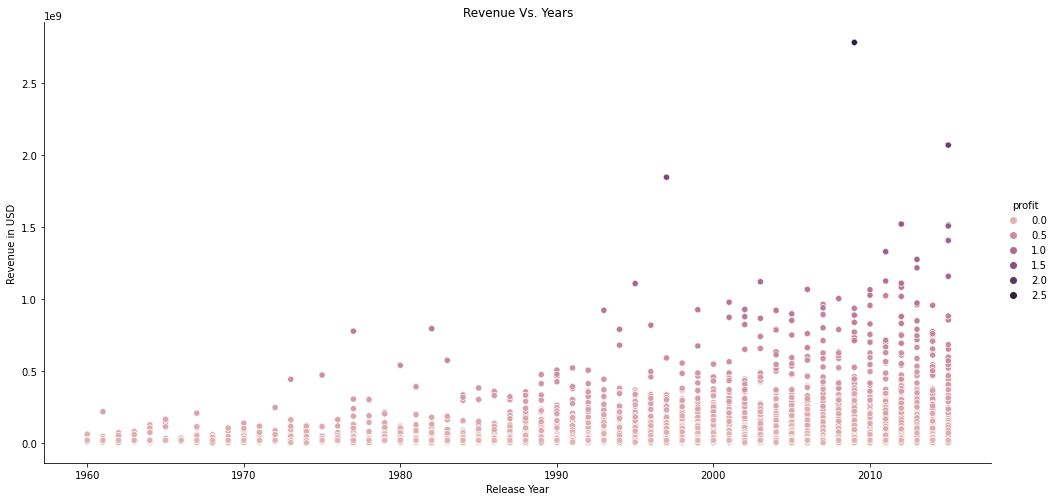

In [31]:
df = sns.relplot(data=df_merged, x='release_year', y='revenue', hue='profit', height=7, aspect=2);
label('Release Year', 'Revenue in USD', 'Revenue Vs. Years')

>According to the above chart, there is a strong correlation between the year movies were released, revenue, and profit. As time passes, both revenue and profit increase.

### Research Question 4 (Is there a correlation between runtime and popularity?)

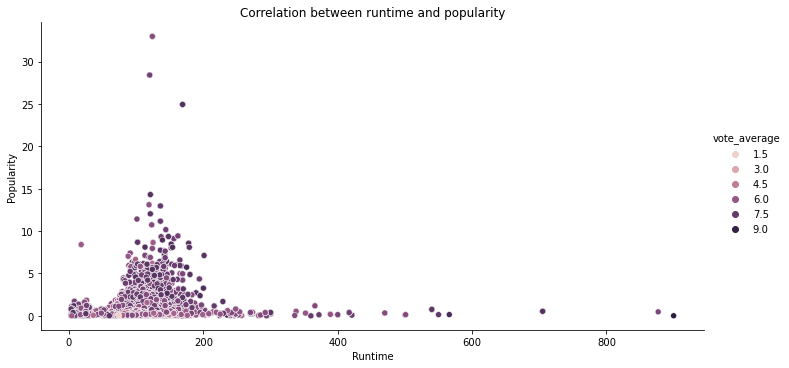

In [32]:
df = sns.relplot(data=df_merged, x='runtime', y='popularity', hue='vote_average', aspect=2);
label('Runtime', 'Popularity', 'Correlation between runtime and popularity')

>Popularity and runtime are clearly correlated. Movies with the greatest popularity last 50 to 150 minutes on average.

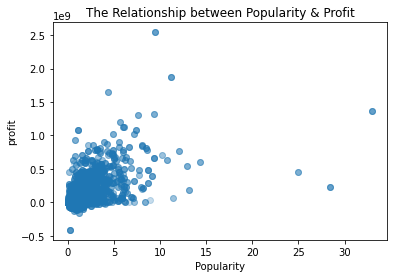

In [33]:
plt.scatter(df_merged['popularity'], df_merged['profit'], alpha=0.25)
label('Popularity', 'profit', 'The Relationship between Popularity & Profit')

>Based on the plotted data above, we can see that popularity and profit are positively correlated.

## <a id='conclusions'></a>
## Conclusions
<body>
<p>1-The number of movies released has increased over time.
<p>2-In 2014, there were most movies released.
<p>3-1969 had the least number of movies released.
<p>4-Approximately 3K movies have been released between 2011 and 2015.
<p>5-AVATAR is the most profitable movie.
<p>6-Here are the movies with the highest profit margins:
        -Avatar.
        -Star Wars: The Force Awakens.
        -Titanic.
        -Jurassic World.
        -Furious 7.    
        
<p>7-Drama, Comedy, Thriller, Action, and Romance were the most popular genres.
<p>8-Adventure, Action, Comedy, Drama, and Thriller are genres that generate the most profit.
<p>9-The relationship between the release year of the films and their revenue is left-skewed, implying that there is a     correlation between them.
<p>10-The majority of popular films last between 50 and 150 minutes.
    <p>We can dig deeper into the analysis process for some parts of our processes, such as the annual profits and the most popular and highly rated directors as example.<p>

## Limitation
<body>
       <p> In spite of the dataset is quite large, there are zeros and missed values that I have removed or substituted by the mean, which affects the final results in a negative way.</p>
    <p>Depending on vote average is not quite accurate as long as the count of the votes of each movie varies from one to another.</p>
    <p>As noticed there are some outliers in the datatset which might affect the accuracy of the results.</p>